# Firewall Rule Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from scipy import stats

In [4]:
df = pd.read_csv('../Datasets/Firewall_Rule_Classification.csv')
df.head()

,Unnamed: 0,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Class
0,0,33313,443,29395,443,9675,2389,7286,43,143,21,22,allow
1,1,53871,443,15841,443,7797,1807,5990,15,135,7,8,allow
2,2,56628,443,13354,443,8240,3521,4719,25,18,15,10,allow
3,3,50270,445,0,0,70,70,0,1,0,1,0,drop
4,4,64113,53,33491,53,294,134,160,2,30,1,1,allow


In [5]:
df = df.drop(['Unnamed: 0', 'NAT Source Port', 'NAT Destination Port', 'Bytes Sent', 'Bytes Received', 'pkts_sent', 'pkts_received'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262128 entries, 0 to 262127
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Source Port         262128 non-null  int64 
 1   Destination Port    262128 non-null  int64 
 2   Bytes               262128 non-null  int64 
 3   Packets             262128 non-null  int64 
 4   Elapsed Time (sec)  262128 non-null  int64 
 5   Class               262128 non-null  object
dtypes: int64(5), object(1)
memory usage: 12.0+ MB


In [7]:
df['Class'].value_counts()

allow         150314
deny           60053
drop           51539
reset-both       222
Name: Class, dtype: int64

In [8]:
le = LabelEncoder()
le.fit(df['Class'])
encoded_labels = le.transform(df['Class'])

In [9]:
encoded_labels

array([0, 0, 0, ..., 2, 2, 1])

In [10]:
df['Target'] = df['Class'].apply(lambda x: 0 if x == 'allow' else 1)

In [11]:
df.describe()

,Source Port,Destination Port,Bytes,Packets,Elapsed Time (sec),Target
count,262128.000000,262128.000000,2.621280e+05,2.621280e+05,262128.000000,262128.000000
mean,49351.107871,10623.147405,1.031905e+05,1.058449e+02,65.457692,0.426563
std,15259.968678,18509.668217,6.107068e+06,5.311349e+03,299.143576,0.494578
min,0.000000,0.000000,6.000000e+01,1.000000e+00,0.000000,0.000000
25%,49174.000000,80.000000,6.600000e+01,1.000000e+00,0.000000,0.000000
50%,53763.000000,445.000000,1.680000e+02,2.000000e+00,15.000000,0.000000
75%,58638.000000,15000.000000,7.540000e+02,6.000000e+00,30.000000,1.000000
max,65534.000000,65535.000000,1.269359e+09,1.036116e+06,10824.000000,1.000000


In [12]:
df['Target'].value_counts()

0    150314
1    111814
Name: Target, dtype: int64

In [13]:
df.isna().sum()

Source Port           0
Destination Port      0
Bytes                 0
Packets               0
Elapsed Time (sec)    0
Class                 0
Target                0
dtype: int64

<AxesSubplot:>

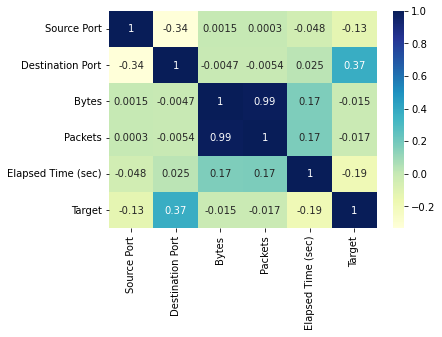

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## Visulizations

<AxesSubplot:xlabel='Bytes', ylabel='Elapsed Time (sec)'>

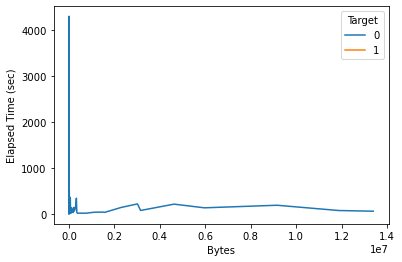

In [32]:
sns.lineplot(x='Bytes', y='Elapsed Time (sec)', hue='Target', data=df.iloc[-1000:])

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(['Class', 'Target'], axis=1)
y = df['Target']

In [18]:
len(y)

262128

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
len(y_train), len(y_test)

(183489, 78639)

### Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

### BASE MODELS

In [23]:
def base_model_prediction(model_class):
    model = model_class()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    classifi_rep = classification_report(y_test, predictions)
    cf_mat = confusion_matrix(y_test, predictions)
    
    return [acc, classifi_rep, cf_mat]

Logistic Regression

In [53]:
logistic_reg_res = base_model_prediction(LogisticRegression)

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
print("Accuracy Obtained: ", logistic_reg_res[0])

Accuracy Obtained:  0.9990844237592035


In [56]:
print(logistic_reg_res[1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45177
           1       1.00      1.00      1.00     33462

    accuracy                           1.00     78639
   macro avg       1.00      1.00      1.00     78639
weighted avg       1.00      1.00      1.00     78639



In [61]:
logistic_reg_res[2]

array([[45137,    40],
       [   32, 33430]], dtype=int64)

Random Forest Classifier

In [63]:
rf_results = base_model_prediction(RandomForestClassifier)

In [64]:
print("Accuracy Obtained: ", rf_results[0])

Accuracy Obtained:  0.9998219712865117


In [65]:
print(rf_results[1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45177
           1       1.00      1.00      1.00     33462

    accuracy                           1.00     78639
   macro avg       1.00      1.00      1.00     78639
weighted avg       1.00      1.00      1.00     78639



In [66]:
rf_results[2]

array([[45164,    13],
       [    1, 33461]], dtype=int64)

KNN

In [24]:
knn_res = base_model_prediction(KNeighborsClassifier)

In [25]:
print("Accuracy Score:", knn_res[0])

Accuracy Score: 0.9939215910680451


In [26]:
print(knn_res[1])

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45177
           1       0.99      1.00      0.99     33462

    accuracy                           0.99     78639
   macro avg       0.99      0.99      0.99     78639
weighted avg       0.99      0.99      0.99     78639



In [27]:
knn_res[2]

array([[44858,   319],
       [  159, 33303]], dtype=int64)